In [ ]:
import pandas as pd
import numpy as np

# 載入資料(Load the dataset)
data = pd.read_csv(r"D:\Simple-Facial-Emotion-Recognition\fer2013.csv")


#將pixels欄位中的像素資料轉換為 numpy 陣列
#(Convert the 'pixels' column from string to a numpy array, reshaping it to 48x48 pixels with 1 channel)
data['pixels'] = data['pixels'].apply(lambda pixel_sequence: np.array([int(pixel) for pixel in pixel_sequence.split()]).reshape(48, 48, 1))


# 將情緒標籤與像素分離("separate emotion labels from pixels)
X = np.array(data['pixels'].tolist()) #Extract pixel data as numpy array
y = pd.get_dummies(data['emotion']).values  # 使用 one-hot encoding 將情緒標籤轉換為二進制形式(Convert emotion labels to one-hot encoded format)

In [3]:
X = X / 255.0  # 將像素值縮放到 [0, 1] (scale pixel values to [0, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 卷積層和池化層(Convolutional layer and Pooling layer)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 平坦化和全連接層(flattening and fully connected layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 加入 dropout 避免過擬合(add dropout to prevent overfitting)
model.add(Dense(7, activation='softmax'))  # 7 個情緒分類(seven types of emotion classification)

# 編譯模型(compile the model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Eric Lu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.2569 - loss: 1.8049 - val_accuracy: 0.4167 - val_loss: 1.5139
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.4281 - loss: 1.4917 - val_accuracy: 0.4877 - val_loss: 1.3590
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.4801 - loss: 1.3636 - val_accuracy: 0.5065 - val_loss: 1.2820
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.5128 - loss: 1.2891 - val_accuracy: 0.5361 - val_loss: 1.2200
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.5384 - loss: 1.2235 - val_accuracy: 0.5428 - val_loss: 1.1969
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.5630 - loss: 1.1644 - val_accuracy: 0.5580 - val_loss: 1.1734
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5739 - loss: 1.1257 - val_accuracy: 0.5605 - val_loss: 1.1627
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.5898 - loss: 1.0863 - 

In [ ]:
model.save('emotion_model.h5')

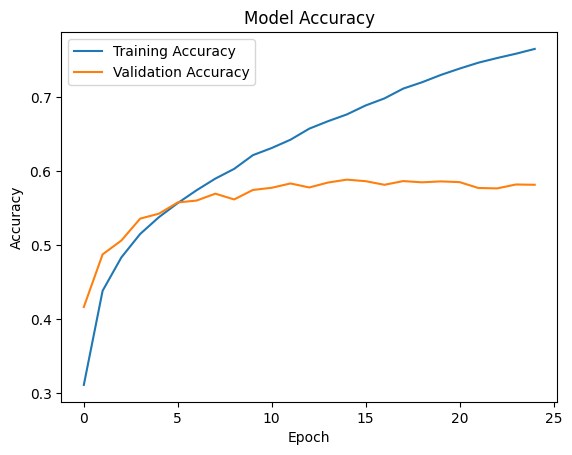

In [7]:
import matplotlib.pyplot as plt

# 訓練與驗證準確率
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


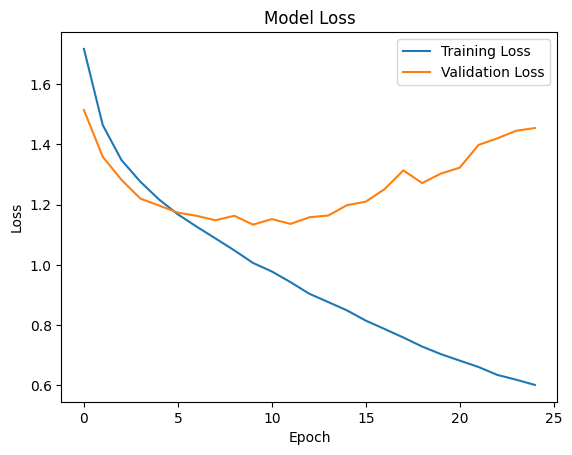

In [8]:
# 繪製訓練與驗證損失
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
# 假設 X_test 和 y_test 是你的測試數據集
evaluation = model.evaluate(X_test, y_test)

# 列出評估結果
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1]}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5866 - loss: 1.4409
Loss: 1.4542555809020996
Accuracy: 0.5817776322364807


In [10]:
# 評估模型並列出所有指標的值
evaluation = model.evaluate(X_test, y_test)

for i, metric_name in enumerate(model.metrics_names):
    print(f"{metric_name}: {evaluation[i]}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5866 - loss: 1.4409
loss: 1.4542555809020996
compile_metrics: 0.5817776322364807
